In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'whitegrid')
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [2]:
data_train = pd.read_csv('train_data.csv')
data_test = pd.read_csv('test_data.csv')
data_train_dict = pd.read_csv('train_data_dictionary.csv')

In [3]:
data_train_dict

,Column,Description
0,case_id,Case_ID registered in Hospital
1,Hospital_code,Unique code for the Hospital
2,Hospital_type_code,Unique code for the type of Hospital
3,City_Code_Hospital,City Code of the Hospital
4,Hospital_region_code,Region Code of the Hospital
5,Available Extra Rooms in Hospital,Number of Extra rooms available in the Hospital
6,Department,Department overlooking the case
7,Ward_Type,Code for the Ward type
8,Ward_Facility_Code,Code for the Ward Facility
9,Bed Grade,Condition of Bed in the Ward


In [4]:
train = data_train.copy()
train.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [5]:
test = data_test.copy()
test.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
0,318439,21,c,3,Z,3,gynecology,S,A,2.0,17006,2.0,Emergency,Moderate,2,71-80,3095.0
1,318440,29,a,4,X,2,gynecology,S,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4018.0
2,318441,26,b,2,Y,3,gynecology,Q,D,4.0,17006,2.0,Emergency,Moderate,3,71-80,4492.0
3,318442,6,a,6,X,3,gynecology,Q,F,2.0,17006,2.0,Trauma,Moderate,3,71-80,4173.0
4,318443,28,b,11,X,2,gynecology,R,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4161.0


In [6]:
print(data_train.info())
print('\n')
print(data_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

In [7]:
from collections import Counter
Counter(train['Stay'].tolist())

Counter({'0-10': 23604,
         '41-50': 11743,
         '31-40': 55159,
         '11-20': 78139,
         '51-60': 35018,
         '21-30': 87491,
         '71-80': 10254,
         'More than 100 Days': 6683,
         '81-90': 4838,
         '61-70': 2744,
         '91-100': 2765})

# Exploratory Data Analysis

In [8]:
# Get lower and upper bound value on column "Age"
train['Lower_Bound_Age'] = train['Age'].str.split('-', expand = True)[0].astype(int)
train['Upper_Bound_Age'] = train['Age'].str.split('-', expand = True)[1].astype(int)

test['Lower_Bound_Age'] = test['Age'].str.split('-', expand = True)[0].astype(int)
test['Upper_Bound_Age'] = test['Age'].str.split('-', expand = True)[1].astype(int)

In [9]:
# split data (data train) into numerical and categorical data
num_data = train[['Available Extra Rooms in Hospital', 'Bed Grade', 'Visitors with Patient'
             , 'Admission_Deposit', 'Lower_Bound_Age', 'Upper_Bound_Age']]

cat_data = train[['Hospital_code', 'Hospital_type_code', 'City_Code_Hospital', 'Hospital_region_code'
             , 'Department', 'Ward_Type', 'Ward_Facility_Code', 'City_Code_Patient', 'Type of Admission'
             , 'Severity of Illness', 'Stay']]

print(num_data.info())
print('\n')
print(cat_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 6 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Available Extra Rooms in Hospital  318438 non-null  int64  
 1   Bed Grade                          318325 non-null  float64
 2   Visitors with Patient              318438 non-null  int64  
 3   Admission_Deposit                  318438 non-null  float64
 4   Lower_Bound_Age                    318438 non-null  int64  
 5   Upper_Bound_Age                    318438 non-null  int64  
dtypes: float64(2), int64(4)
memory usage: 14.6 MB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Hospital_code         318438 non-null  int64  
 1   Hospital_type_code    318438 non-null  o

### Analysis numeric data

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

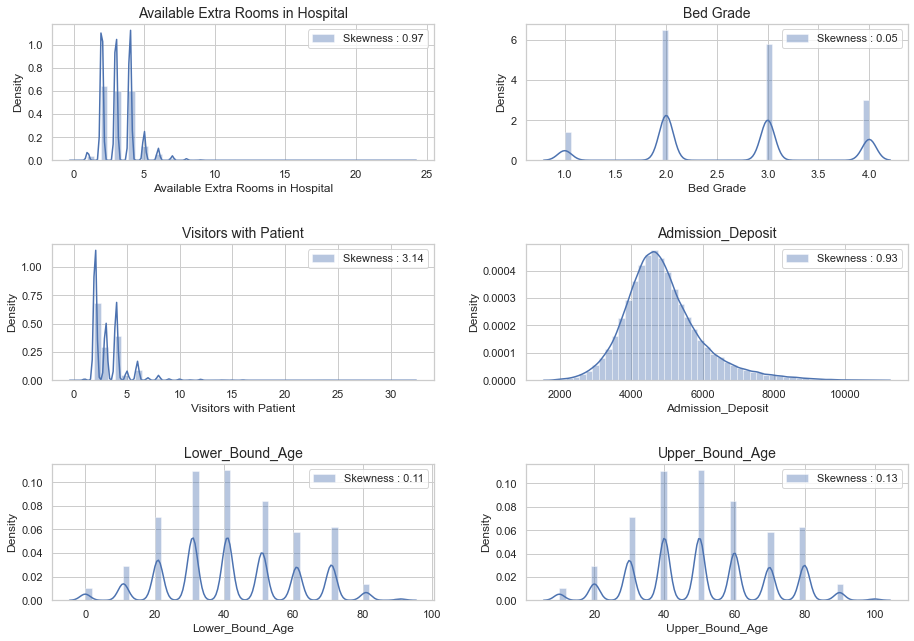

In [10]:
fig, ax =plt.subplots(3,2, figsize=(14,10))
fig.tight_layout(pad=5.0)

for ax, n in zip(ax.flatten(), num_data.columns.tolist()):
    sns.distplot(ax=ax, a=num_data[n].dropna(), label="Skewness : %.2f"%(num_data[n].skew()))
    ax.set_title(n, fontsize = 14)
    ax.legend(loc = 'best')

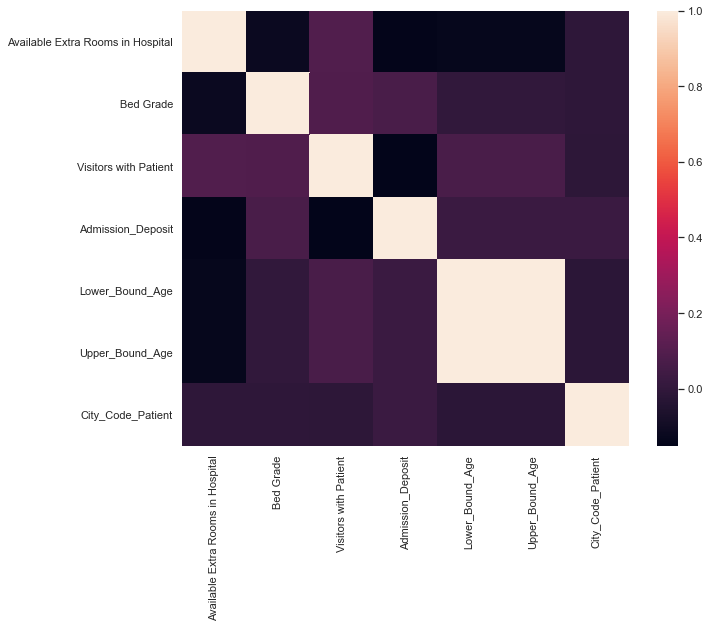

In [11]:
# Heatmap data numeric
heatmapdata = train[['Stay', 'Available Extra Rooms in Hospital', 'Bed Grade', 'Visitors with Patient'
             , 'Admission_Deposit', 'Lower_Bound_Age', 'Upper_Bound_Age', 'City_Code_Patient']]

cormat = heatmapdata.corr()
fig, ax = plt.subplots(figsize = (10,8))
sns.heatmap(data = cormat)
plt.show()


### Analysis Categorical Data

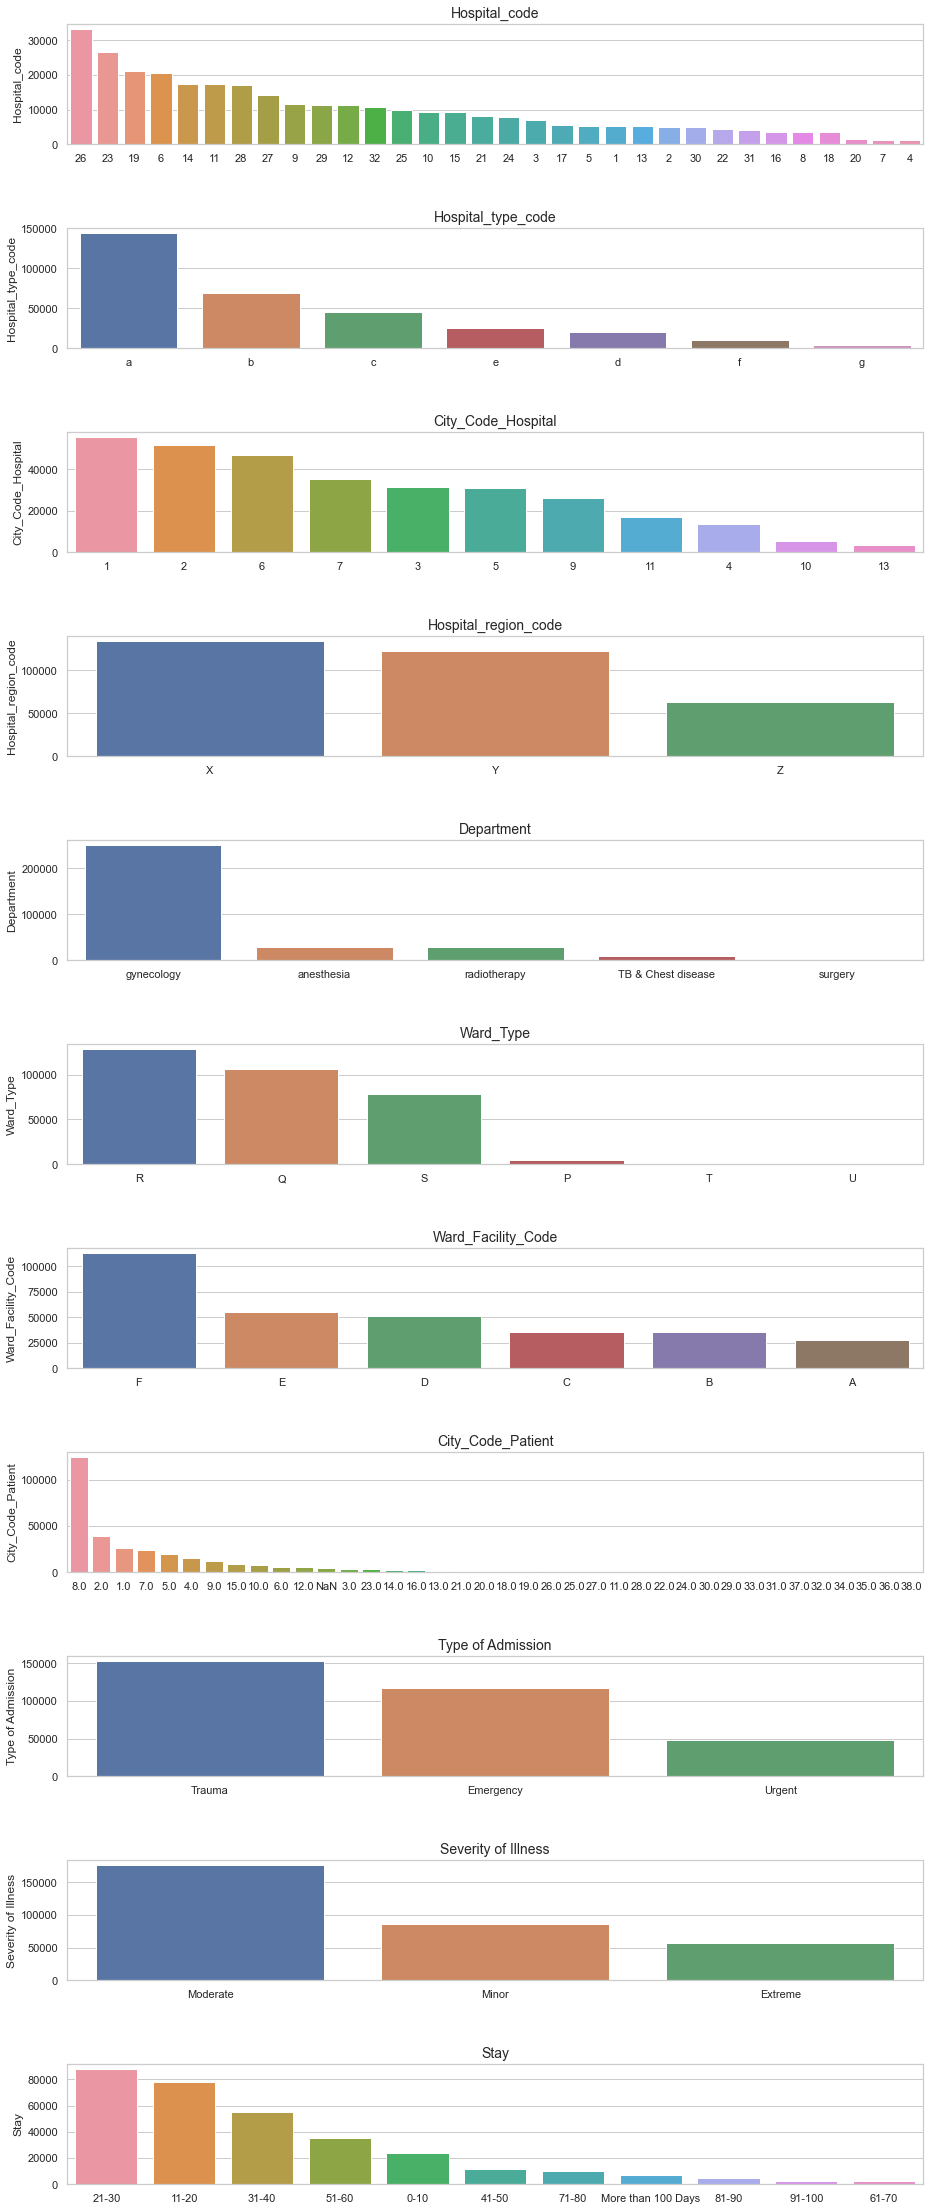

In [12]:
fig, ax = plt.subplots(cat_data.shape[1],1, figsize = (14, 32))
fig.tight_layout(pad = 5.0)

for ax, n in zip(ax.flatten(), cat_data.columns.tolist()):
    x_axis = cat_data[n].fillna('NaN').value_counts().index
    y_axis = cat_data[n].fillna('NaN').value_counts()
    sns.barplot(ax = ax, x = x_axis, y = y_axis, order =  x_axis)
    ax.set_title(n, fontsize = 14)
    
plt.show()

# Preprocessing Data (handle missing data, cleaning data, feature engineering, etc.) on Each Columns

In [13]:
# Manipulate columns position to easly do preprocessing data

# Move columns 'Stay' to first position
train = train[['Stay'] + [col for col in train.columns.tolist() if col != 'Stay']]
# Create columns 'Stay' so that same shape with data train
test.insert(0, 'Stay', 'NaN')

## Handle Missing Data

In [14]:
print('Total null value on data train (%) :\n', np.round(train.isnull().sum() * 100 / len(train), 4))
print('\n')
print('Total null value on data test (%) :\n', np.round(test.isnull().sum() * 100 / len(test), 4))

Total null value on data train (%) :
 Stay                                 0.0000
case_id                              0.0000
Hospital_code                        0.0000
Hospital_type_code                   0.0000
City_Code_Hospital                   0.0000
Hospital_region_code                 0.0000
Available Extra Rooms in Hospital    0.0000
Department                           0.0000
Ward_Type                            0.0000
Ward_Facility_Code                   0.0000
Bed Grade                            0.0355
patientid                            0.0000
City_Code_Patient                    1.4232
Type of Admission                    0.0000
Severity of Illness                  0.0000
Visitors with Patient                0.0000
Age                                  0.0000
Admission_Deposit                    0.0000
Lower_Bound_Age                      0.0000
Upper_Bound_Age                      0.0000
dtype: float64


Total null value on data test (%) :
 Stay                        

In [15]:
# drop missing value on columns 'Bed Grade' and 'City_Code_Patient'
train.dropna(subset = ['Bed Grade', 'City_Code_Patient'], inplace = True)

test['Bed Grade'].fillna(train['Bed Grade'].mode()[0], inplace = True)
test['City_Code_Patient'].fillna(train['City_Code_Patient'].mode()[0], inplace = True)

In [16]:
print('Total null value on data train (%) :\n', np.round(train.isnull().sum() * 100 / len(train), 4))
print('\n')
print('Total null value on data test (%) :\n', np.round(test.isnull().sum() * 100 / len(test), 4))

Total null value on data train (%) :
 Stay                                 0.0
case_id                              0.0
Hospital_code                        0.0
Hospital_type_code                   0.0
City_Code_Hospital                   0.0
Hospital_region_code                 0.0
Available Extra Rooms in Hospital    0.0
Department                           0.0
Ward_Type                            0.0
Ward_Facility_Code                   0.0
Bed Grade                            0.0
patientid                            0.0
City_Code_Patient                    0.0
Type of Admission                    0.0
Severity of Illness                  0.0
Visitors with Patient                0.0
Age                                  0.0
Admission_Deposit                    0.0
Lower_Bound_Age                      0.0
Upper_Bound_Age                      0.0
dtype: float64


Total null value on data test (%) :
 Stay                                 0.0
case_id                              0.0
Hospit

## Cleaning Data on Columns 'Available Extra Rooms', 'Visitors with Patient' & 'Admission Deposit'

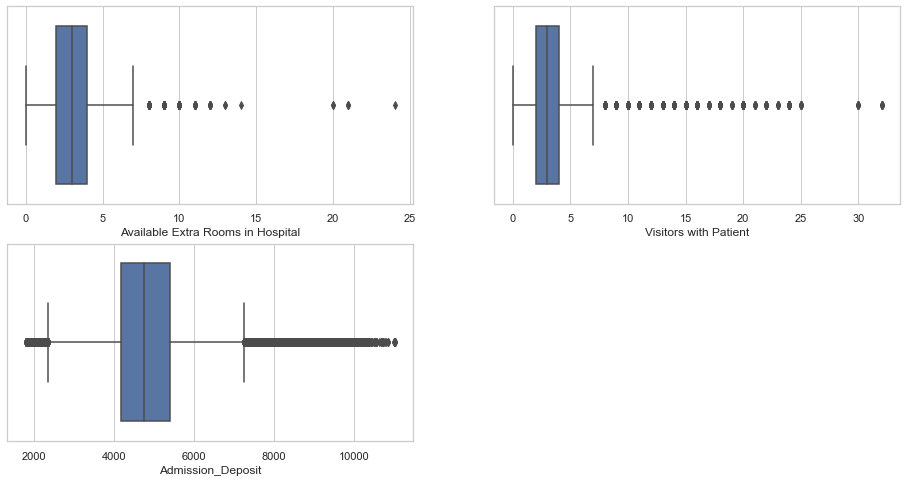

In [17]:
fig, ax = plt.subplots(2,2, figsize = (16,8))
sns.boxplot(ax = ax[0, 0], x = train['Available Extra Rooms in Hospital'])
sns.boxplot(ax = ax[0, 1], x = train['Visitors with Patient'])
sns.boxplot(ax = ax[1, 0], x = train['Admission_Deposit'])
fig.delaxes(ax[1,1])

plt.show()

In [18]:
# Remove outliers from data train
# https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba

q1 = train['Available Extra Rooms in Hospital'].quantile(0.25)
q3 = train['Available Extra Rooms in Hospital'].quantile(0.75)
iqr = q3-q1
train = train[~((train['Available Extra Rooms in Hospital'] < (q1 - 1.5 * iqr)) | (train['Available Extra Rooms in Hospital'] > (q3+1.5*iqr)))]

q1=train['Visitors with Patient'].quantile(0.25)
q3 = train['Visitors with Patient'].quantile(0.75)
iqr = q3-q1
train = train[~ ((train['Visitors with Patient'] < q1 - 1.5 * iqr) | (train['Visitors with Patient'] > (q3 + 1.5 * iqr)))]

q1=train['Admission_Deposit'].quantile(0.25)
q3 = train['Admission_Deposit'].quantile(0.75)
iqr = q3-q1
train = train[~ ((train['Admission_Deposit'] < q1 - 1.5 * iqr) | (train['Admission_Deposit'] > (q3 + 1.5 * iqr)))]

In [19]:
# Do log transform on data train
train['Available Extra Rooms in Hospital'] = np.log(train['Available Extra Rooms in Hospital'] + 1)
train['Visitors with Patient'] = np.log(train['Visitors with Patient'] + 1)
# Remove outliers after log transform on data train
train = train[train['Available Extra Rooms in Hospital'] > 0]
train = train[train['Visitors with Patient'] > 0]

# Do the same log transform on data test ( for make the same scale value with data train) 
test['Available Extra Rooms in Hospital'] = np.log(test['Available Extra Rooms in Hospital'] + 1)
test['Visitors with Patient'] = np.log(test['Visitors with Patient'] + 1)

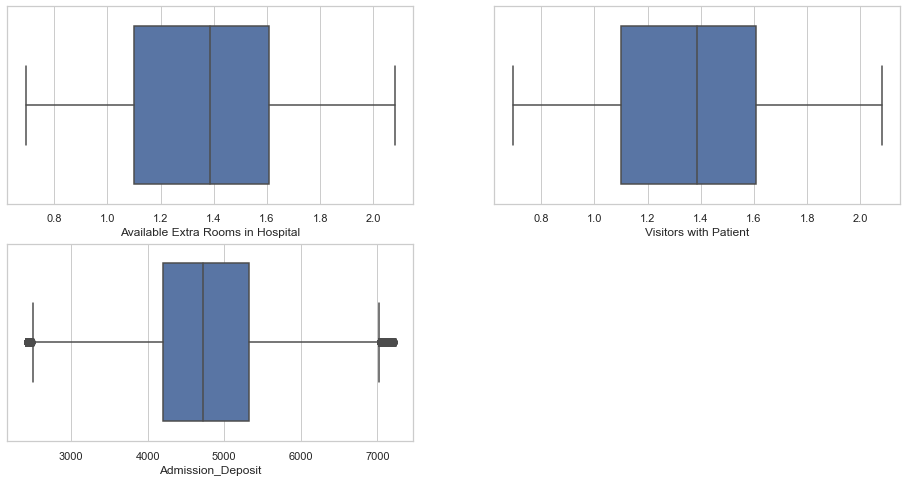

In [20]:
fig, ax = plt.subplots(2,2, figsize = (16,8))
sns.boxplot(ax = ax[0, 0], x = train['Available Extra Rooms in Hospital'])
sns.boxplot(ax = ax[0, 1], x = train['Visitors with Patient'])
sns.boxplot(ax = ax[1, 0], x = train['Admission_Deposit'])
fig.delaxes(ax[1,1])
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

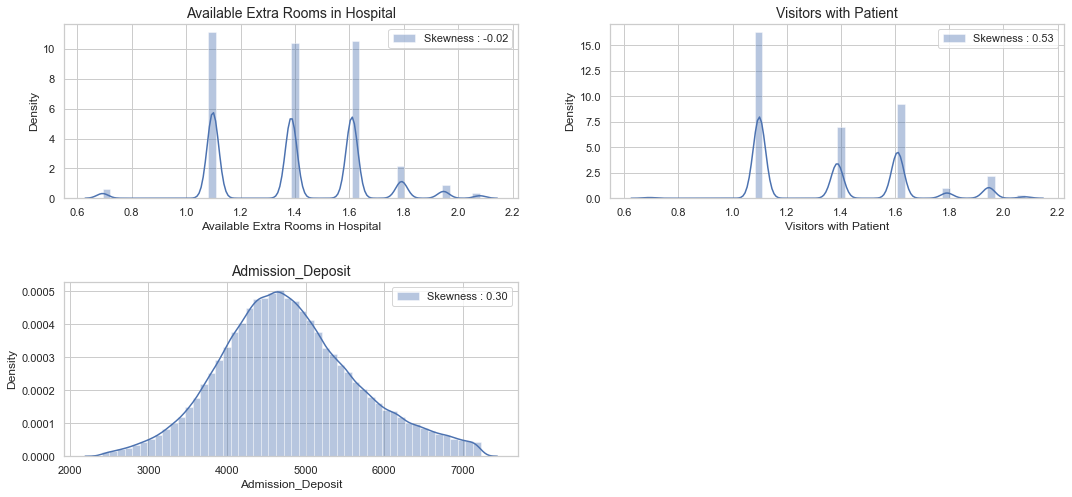

In [21]:
fig, ax =plt.subplots(2,2, figsize=(16,8))
fig.tight_layout(pad=5.0)

sns.distplot(ax=ax[0, 0], a=train['Available Extra Rooms in Hospital']
             , label="Skewness : %.2f"%(train['Available Extra Rooms in Hospital'].skew()))
ax[0, 0].set_title('Available Extra Rooms in Hospital', fontsize = 14)
ax[0, 0].legend(loc = 'best')

sns.distplot(ax=ax[0, 1], a=train['Visitors with Patient']
             , label="Skewness : %.2f"%(train['Visitors with Patient'].skew()))
ax[0, 1].set_title('Visitors with Patient', fontsize = 14)
ax[0, 1].legend(loc = 'best')

sns.distplot(ax=ax[1, 0], a=train['Admission_Deposit']
             , label="Skewness : %.2f"%(train['Admission_Deposit'].skew()))
ax[1, 0].set_title('Admission_Deposit', fontsize = 14)
ax[1, 0].legend(loc = 'best')

fig.delaxes(ax[1,1])

plt.show()

## Encode Categorical Data¶

### Do Encoding on Ordinal Data¶


In [22]:
admission_encode = {'Trauma' : 1, 'Urgent' : 2, 'Emergency' : 3}
train['Type of Admission'] = train['Type of Admission'].map(admission_encode)
test['Type of Admission'] = test['Type of Admission'].map(admission_encode)


severity_encode = {'Minor' : 1, 'Moderate' : 2, 'Extreme' : 3}
train['Severity of Illness'] = train['Severity of Illness'].map(severity_encode)
test['Severity of Illness'] = test['Severity of Illness'].map(severity_encode)

stay_encode = {'0-10' : 1, '11-20' : 2, '21-30' : 3, '31-40' : 4, '41-50' : 5, '51-60' : 6, '61-70' : 7
            ,'71-80' : 8, '81-90' : 9, '91-100' : 10, 'More than 100 Days' : 11}
train['Stay'] = train['Stay'].map(stay_encode)

### Do One Hot Encoder on Nominal Data¶


In [23]:
from sklearn.preprocessing import OneHotEncoder
# By dropping one of the one-hot encoded columns from each categorical feature, we ensure there are no "reference" columns—the remaining columns become linearly independent.
# https://kiwidamien.github.io/are-you-getting-burned-by-one-hot-encoding.html
# https://www.youtube.com/watch?v=g9aLvY8BfRM
nominal_data = ['Hospital_type_code', 'Hospital_region_code', 'Department', 'Ward_Type', 'Ward_Facility_Code']
testja = pd.DataFrame()
for n in nominal_data:
    ohe = OneHotEncoder(sparse = False, drop = 'first', categories = 'auto')
    ohe.fit(train[nominal_data])
    ohecategory_train = ohe.transform(train[nominal_data])
    ohecategory_test = ohe.transform(test[nominal_data])

    for i in range(ohecategory_train.shape[1]):
        train['dummy_variable_' + n + '_' + str(i)] = ohecategory_train[:,i]
        
    for i in range(ohecategory_test.shape[1]):
        test['dummy_variable_' + n + '_' + str(i)] = ohecategory_test[:,i]


print('Train shape :', train.shape)
print('Test shape :', test.shape)

Train shape : (291276, 130)
Test shape : (137057, 130)


## Standardization Numerical Data¶


In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
num_col = ['Available Extra Rooms in Hospital', 'Bed Grade', 'Visitors with Patient'
             , 'Admission_Deposit', 'Lower_Bound_Age', 'Upper_Bound_Age']
sc.fit(train[num_col])
train[num_col] = sc.transform(train[num_col])
test[num_col] = sc.transform(test[num_col])

In [25]:
train[num_col].head()

,Available Extra Rooms in Hospital,Bed Grade,Visitors with Patient,Admission_Deposit,Lower_Bound_Age,Upper_Bound_Age
0,-0.033385,-0.692066,-0.937792,0.138237,0.466474,0.466504
1,-1.120711,-0.692066,-0.937792,1.322949,0.466474,0.466504
2,-1.120711,-0.692066,-0.937792,-0.050318,0.466474,0.466504
4,-1.120711,-0.692066,-0.937792,0.873145,0.466474,0.466504
5,-1.120711,-0.692066,-0.937792,-0.386535,0.466474,0.466504


# Feature Selection¶


In [26]:
# See if train and test data have same shape and column position
print('Train columns :\n',train.columns)
print('Train shape : ', train.shape)
print('\n')
print('Test columns :\n',test.columns)
print('Test shape : ', test.shape)

Train columns :
 Index(['Stay', 'case_id', 'Hospital_code', 'Hospital_type_code',
       'City_Code_Hospital', 'Hospital_region_code',
       'Available Extra Rooms in Hospital', 'Department', 'Ward_Type',
       'Ward_Facility_Code',
       ...
       'dummy_variable_Ward_Facility_Code_12',
       'dummy_variable_Ward_Facility_Code_13',
       'dummy_variable_Ward_Facility_Code_14',
       'dummy_variable_Ward_Facility_Code_15',
       'dummy_variable_Ward_Facility_Code_16',
       'dummy_variable_Ward_Facility_Code_17',
       'dummy_variable_Ward_Facility_Code_18',
       'dummy_variable_Ward_Facility_Code_19',
       'dummy_variable_Ward_Facility_Code_20',
       'dummy_variable_Ward_Facility_Code_21'],
      dtype='object', length=130)
Train shape :  (291276, 130)


Test columns :
 Index(['Stay', 'case_id', 'Hospital_code', 'Hospital_type_code',
       'City_Code_Hospital', 'Hospital_region_code',
       'Available Extra Rooms in Hospital', 'Department', 'Ward_Type',
       'Ward_

In [27]:
train.head()

,Stay,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,...,dummy_variable_Ward_Facility_Code_12,dummy_variable_Ward_Facility_Code_13,dummy_variable_Ward_Facility_Code_14,dummy_variable_Ward_Facility_Code_15,dummy_variable_Ward_Facility_Code_16,dummy_variable_Ward_Facility_Code_17,dummy_variable_Ward_Facility_Code_18,dummy_variable_Ward_Facility_Code_19,dummy_variable_Ward_Facility_Code_20,dummy_variable_Ward_Facility_Code_21
0,1,1,8,c,3,Z,-0.033385,radiotherapy,R,F,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,5,2,2,c,5,Z,-1.120711,radiotherapy,S,F,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,4,3,10,e,1,X,-1.120711,anesthesia,S,E,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5,5,26,b,2,Y,-1.120711,radiotherapy,S,D,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,2,6,23,a,6,X,-1.120711,anesthesia,S,F,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [28]:
train.drop(['case_id', 'Hospital_code', 'patientid', 'Age', 'City_Code_Hospital', 'City_Code_Patient'
            , 'Hospital_type_code', 'Hospital_region_code', 'Department', 'Ward_Type', 'Ward_Facility_Code']
           , axis = 1, inplace = True)

test.drop(['case_id', 'Hospital_code', 'patientid', 'Age', 'City_Code_Hospital', 'City_Code_Patient'
            , 'Hospital_type_code', 'Hospital_region_code', 'Department', 'Ward_Type', 'Ward_Facility_Code']
           , axis = 1, inplace = True)

### Explanation :

Drop unused features, because :

'case_id', 'Hospital_code', 'patientid' -> I dont need this, its just id columns

'Age' -> because I haved create lower and upper bound age, so this column is not used anymore

'City_Code_Hospital' -> I use hospital_region_code instead of this column, because they have same explanation

'City_Code_Patient' -> I think there are no relations between where patient live and how long they have stayed on hospital and there are to much categories on this column, so i drop it to reduce the dimension of the data

'Hospital_type_code', 'Hospital_region_code', 'Department', 'Ward_Type', 'Ward_Facility_Code' -> because i haved one hot encode them, so I used dummy variable of them

In [29]:
# See if train and test data have same shape and column position
print('Train columns :\n',train.columns)
print('Train shape : ', train.shape)
print('\n')
print('Test columns :\n',test.columns)
print('Test shape : ', test.shape)

Train columns :
 Index(['Stay', 'Available Extra Rooms in Hospital', 'Bed Grade',
       'Type of Admission', 'Severity of Illness', 'Visitors with Patient',
       'Admission_Deposit', 'Lower_Bound_Age', 'Upper_Bound_Age',
       'dummy_variable_Hospital_type_code_0',
       ...
       'dummy_variable_Ward_Facility_Code_12',
       'dummy_variable_Ward_Facility_Code_13',
       'dummy_variable_Ward_Facility_Code_14',
       'dummy_variable_Ward_Facility_Code_15',
       'dummy_variable_Ward_Facility_Code_16',
       'dummy_variable_Ward_Facility_Code_17',
       'dummy_variable_Ward_Facility_Code_18',
       'dummy_variable_Ward_Facility_Code_19',
       'dummy_variable_Ward_Facility_Code_20',
       'dummy_variable_Ward_Facility_Code_21'],
      dtype='object', length=119)
Train shape :  (291276, 119)


Test columns :
 Index(['Stay', 'Available Extra Rooms in Hospital', 'Bed Grade',
       'Type of Admission', 'Severity of Illness', 'Visitors with Patient',
       'Admission_Deposit'

In [30]:
X_train = train.iloc[:, 1:].values
y_train = train.iloc[:, 0].values
X_test = test.iloc[:, 1:].values
y_test = test.iloc[:, 0].values

#print('X_train :\n', X_train[0:5])
#print('y_train :\n', y_train[0:5])

# Model Prediction¶


## Random Forest Classifier¶


### Train and Evaluate a Model Prediction¶


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

x_train_split, x_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size = 0.3, random_state = 0)
clf = RandomForestClassifier(n_estimators=500, max_depth = 20, min_samples_leaf= 10, max_features=0.5)
clf.fit(x_train_split, y_train_split)
y_pred = clf.predict(x_val_split)
accuracy = accuracy_score(y_pred, y_val_split)
print('Accuracy :',accuracy)

### Feature Importances¶


In [ ]:
feature_importances = pd.DataFrame( data = {'Features' : train.iloc[:, 1:].columns
                                    ,'Features Importances' : clf.feature_importances_.tolist()})
feature_importances

In [ ]:
features = []
fi = []
# 'nominal_data' from one hot encoder cell (cell no.27)
for n in nominal_data:
    features.append(n)
    fi.append(feature_importances.loc[feature_importances['Features'].str.contains(n), 'Features Importances'].sum())
    
    feature_importances =  feature_importances[~feature_importances['Features'].str.contains(n)]

fi_nominal_data = pd.DataFrame(list(zip(features, fi)), columns = ['Features', 'Features Importances'])
feature_importances = feature_importances.append(fi_nominal_data).sort_values('Features Importances'
                                                                              , ascending = False).reset_index(drop = True)

feature_importances

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
ax = sns.barplot(ax = ax, data = feature_importances.nlargest(20,'Features Importances')
                 ,x='Features Importances',y='Features')
plt.show()

### Predict Data Test¶


In [ ]:
# Fit the model into the whole data train
clf.fit(X_train, y_train)

In [ ]:
y_pred = clf.predict(X_test)


submission = pd.DataFrame()
submission['case_id'] = data_test['case_id']
submission['Stay'] = y_pred

stay_decode = { 1 : '0-10', 2 : '11-20', 3 : '21-30', 4 : '31-40', 5 : '41-50', 6 : '51-60', 7 : '61-70'
            ,8 : '71-80', 9 : '81-90', 10 : '91-100', 11 : 'More than 100 Days'}

submission['Stay'] = submission['Stay'].map(stay_decode)
submission

In [ ]:
submission.to_csv(r'Submission.csv', index = False, header = True)

In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score

# x_train_split, x_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size = 0.3, random_state = 0)
# clf = RandomForestClassifier(n_estimators=500, max_depth = 20, min_samples_leaf= 10, max_features=0.5)
# clf.fit(x_train_split, y_train_split)
# y_pred = clf.predict(x_val_split)
# accuracy = accuracy_score(y_pred, y_val_split)
# print('Accuracy :',accuracy)

In [ ]:
# from sklearn.tree import DecisionTreeClassifier
# decision_tree = DecisionTreeClassifier()
# decision_tree.fit(x_train_split, y_train_split)
# Y_pred = decision_tree.predict(x_val_split)
# acc_decision_tree = round(decision_tree.score(x_train_split, y_train_split) * 100, 2)
# acc_decision_tree

In [ ]:
# random_forest = RandomForestClassifier(n_estimators=500)
# random_forest.fit(x_train_split, y_train_split)
# Y_pred = random_forest.predict(x_val_split)
# random_forest.score(x_train_split, y_train_split)
# acc_random_forest = round(random_forest.score(x_train_split, y_train_split) * 100, 2)
# acc_random_forest

In [ ]:
# from sklearn import svm
# clf = svm.SVC(kernel = 'linear')
# clf.fit(x_train_split, y_train_split)

In [ ]:
# from sklearn.neighbors import KNeighborsClassifier
# knn = KNeighborsClassifier(n_neighbors = 3)
# knn.fit(x_train_split, y_train_split)
# Y_pred = knn.predict(x_val_split)
# acc_knn = round(knn.score(x_train_split, y_train_split) * 100, 2)
# acc_knn

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

x_train_split, x_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size = 0.3, random_state = 0)
clf = DecisionTreeClassifier()
num_trees = 100
clf = BaggingClassifier(n_estimators=num_trees, random_state=502)
clf.fit(x_train_split, y_train_split)
y_pred = clf.predict(x_val_split)
accuracy = accuracy_score(y_pred, y_val_split)
print('Accuracy :',accuracy)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

x_train_split, x_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size = 0.3, random_state = 0)
#clf = RandomForestClassifier(n_estimators=500, max_depth = 20, min_samples_leaf= 10, max_features=0.5)
clf = AdaBoostClassifier(n_estimators = 50, learning_rate = 0.2)
clf.fit(x_train_split, y_train_split)
y_pred = clf.predict(x_val_split)
accuracy = accuracy_score(y_pred, y_val_split)
print('Accuracy :',accuracy)

In [ ]:
#!pip install xgboost
# test regression dataset


from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import train_test_split

x_train_split, x_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size = 0.3, random_state = 0)
#clf = RandomForestClassifier(n_estimators=500, max_depth = 20, min_samples_leaf= 10, max_features=0.5)
clf = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.2)
clf.fit(x_train_split, y_train_split)
y_pred = clf.predict(x_val_split)
accuracy = accuracy_score(y_pred, y_val_split)
print('Accuracy :',accuracy)